# Harris Corner Detection, Chessboard

### Import resources and display image

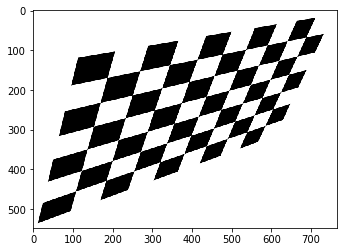

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/skewed_chessboard.png')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

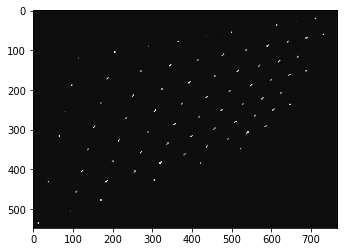

In [2]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# Covert to float type
gray = np.float32(gray)

# Detect corners
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst, None)

plt.imshow(dst, cmap='gray')

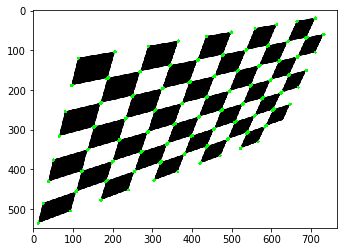

In [3]:
# Define a threshold for extracting strong corners
# This value may vary depending on the image
thresh = 0.01 * dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if (dst[j, i] > thresh):
            # image, center pt, radious, color, thickness
            cv2.circle(corner_image, (i, j), 2, (0, 255, 0), 1)

plt.imshow(corner_image)